In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# import gmaps
import gmaps
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


625

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | gore
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | varhaug
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | kidal
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | sioux lookout
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | rhyl
Processing Record 19 of Set 1 | punta cardon
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | mwinilunga
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | san quintin

Processing Record 34 of Set 4 | bikin
Processing Record 35 of Set 4 | upernavik
Processing Record 36 of Set 4 | sitka
Processing Record 37 of Set 4 | haines junction
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | qarqin
Processing Record 40 of Set 4 | eshowe
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | chimbote
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | yarada
Processing Record 45 of Set 4 | agustin codazzi
Processing Record 46 of Set 4 | maykain
City not found. Skipping...
Processing Record 47 of Set 4 | majene
Processing Record 48 of Set 4 | bonavista
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | katsiveli
City not found. Skipping...
Processing Record 1 of Set 5 | wuwei
Processing Record 2 of Set 5 | kayerkan
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | sharlyk
Processing Record 5 of Set 5 | zachagansk
City not found. Skip

Processing Record 21 of Set 8 | praia da vitoria
Processing Record 22 of Set 8 | kirakira
Processing Record 23 of Set 8 | daru
Processing Record 24 of Set 8 | hereford
Processing Record 25 of Set 8 | sinnamary
Processing Record 26 of Set 8 | vardo
Processing Record 27 of Set 8 | dingolfing
Processing Record 28 of Set 8 | vidim
Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | petrovac
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | lewiston
Processing Record 33 of Set 8 | grimstad
Processing Record 34 of Set 8 | nara
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | saint marys
Processing Record 37 of Set 8 | bacolod
Processing Record 38 of Set 8 | tiarei
Processing Record 39 of Set 8 | north battleford
Processing Record 40 of Set 8 | pochutla
Processing Record 41 of Set 8 | abdanan
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | tres arroyos
Processi

Processing Record 10 of Set 12 | pampa
Processing Record 11 of Set 12 | hamamatsu
Processing Record 12 of Set 12 | zyryanka
Processing Record 13 of Set 12 | luganville
Processing Record 14 of Set 12 | verkh-usugli
Processing Record 15 of Set 12 | olonets
Processing Record 16 of Set 12 | damietta
Processing Record 17 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | hohhot
Processing Record 20 of Set 12 | bacuit
City not found. Skipping...
Processing Record 21 of Set 12 | kalabo
Processing Record 22 of Set 12 | hengyang
Processing Record 23 of Set 12 | logan
Processing Record 24 of Set 12 | shieli
Processing Record 25 of Set 12 | concepcion
Processing Record 26 of Set 12 | peleduy
Processing Record 27 of Set 12 | mamallapuram
Processing Record 28 of Set 12 | isetskoye
Processing Record 29 of Set 12 | kamyshla
Processing Record 30 of Set 12 | murighiol
Processing Record 31 of Set 12 | portel
Processing Record 3

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,36.72,83,1,1.99,US,2021-12-18 00:13:47
1,Gore,-46.1028,168.9436,56.23,45,61,12.37,NZ,2021-12-18 00:13:47
2,Vaini,-21.2000,-175.2000,86.16,74,20,11.50,TO,2021-12-18 00:13:48
3,Fairbanks,64.8378,-147.7164,10.36,83,90,0.00,US,2021-12-18 00:12:31
4,Port Elizabeth,-33.9180,25.5701,61.11,74,14,19.04,ZA,2021-12-18 00:13:48
5,Varhaug,58.6147,5.6457,47.75,96,100,15.26,NO,2021-12-18 00:13:48
6,Broome,42.2506,-75.8330,42.66,59,1,1.01,US,2021-12-18 00:09:49
7,Thompson,55.7435,-97.8558,-9.69,96,100,3.94,CA,2021-12-18 00:13:49
8,Rikitea,-23.1203,-134.9692,75.90,76,99,15.77,PF,2021-12-18 00:13:49
9,Mar Del Plata,-38.0023,-57.5575,73.09,87,73,7.00,AR,2021-12-18 00:09:11


In [41]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-12-18 00:13:47,42.0970,-79.2353,36.72,83,1,1.99
1,Gore,NZ,2021-12-18 00:13:47,-46.1028,168.9436,56.23,45,61,12.37
2,Vaini,TO,2021-12-18 00:13:48,-21.2000,-175.2000,86.16,74,20,11.50
3,Fairbanks,US,2021-12-18 00:12:31,64.8378,-147.7164,10.36,83,90,0.00
4,Port Elizabeth,ZA,2021-12-18 00:13:48,-33.9180,25.5701,61.11,74,14,19.04
5,Varhaug,NO,2021-12-18 00:13:48,58.6147,5.6457,47.75,96,100,15.26
6,Broome,US,2021-12-18 00:09:49,42.2506,-75.8330,42.66,59,1,1.01
7,Thompson,CA,2021-12-18 00:13:49,55.7435,-97.8558,-9.69,96,100,3.94
8,Rikitea,PF,2021-12-18 00:13:49,-23.1203,-134.9692,75.90,76,99,15.77
9,Mar Del Plata,AR,2021-12-18 00:09:11,-38.0023,-57.5575,73.09,87,73,7.00


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


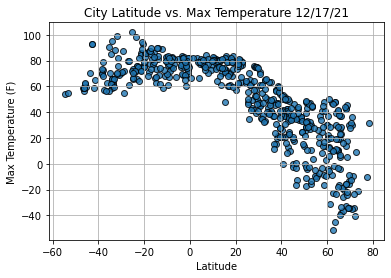

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

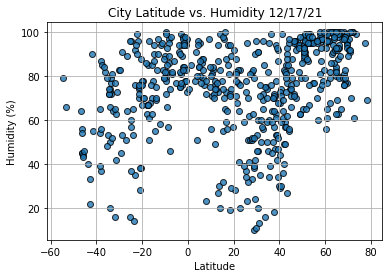

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


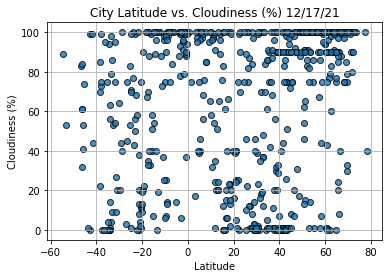

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

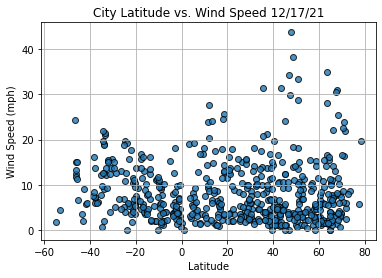

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13=city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-12-18 00:13:50
Lat                         -54.8
Lng                         -68.3
Max Temp                     54.0
Humidity                       79
Cloudiness                     89
Wind Speed                   1.79
Name: 13, dtype: object

In [50]:
city_data_df["Lat"]>= 0

0       True
1      False
2      False
3       True
4      False
       ...  
561     True
562     True
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-12-18 00:13:47,42.0970,-79.2353,36.72,83,1,1.99
3,Fairbanks,US,2021-12-18 00:12:31,64.8378,-147.7164,10.36,83,90,0.00
5,Varhaug,NO,2021-12-18 00:13:48,58.6147,5.6457,47.75,96,100,15.26
6,Broome,US,2021-12-18 00:09:49,42.2506,-75.8330,42.66,59,1,1.01
7,Thompson,CA,2021-12-18 00:13:49,55.7435,-97.8558,-9.69,96,100,3.94


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

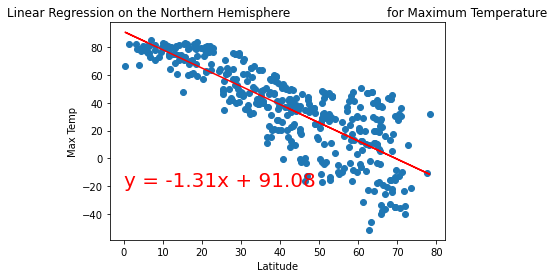

y = -1.31x + 91.08
The r-value is: -0.812


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

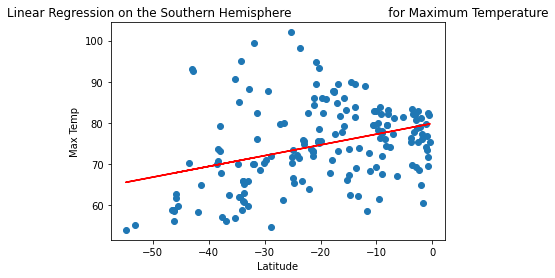

y = 0.26x + 79.88
The r-value is: 0.353


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

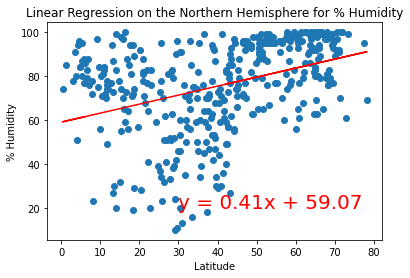

The r-value is: 0.353


In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



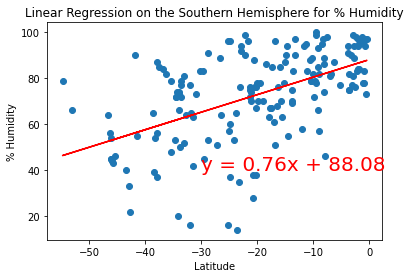

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


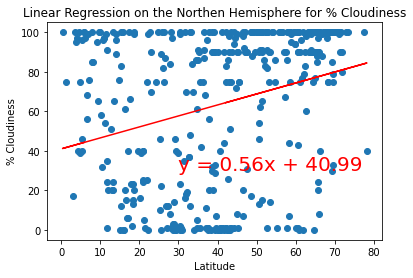

In [57]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


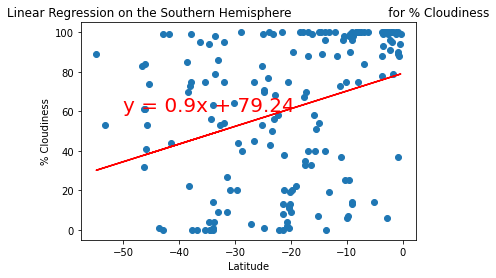

slope is:0.895,intercept is:79.241,r_value is:0.329,P_value is : 0.000,Standard Error is :0.198


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

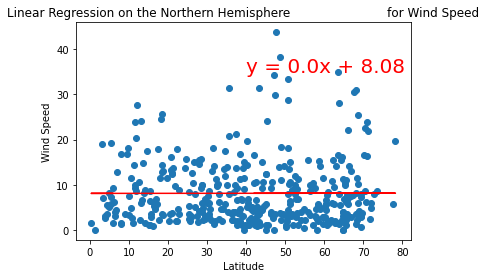

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

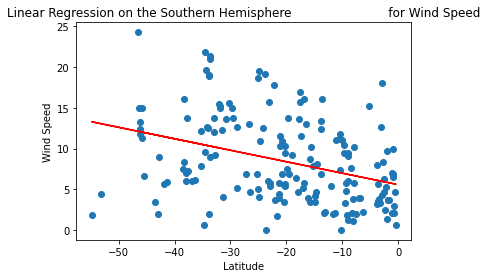

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [61]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import ipywidgets as widgets

# Import the API key.
from config import gkey

In [62]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Jamestown,US,2021-12-18 00:13:47,42.0970,-79.2353,36.72,83,1,1.99
1,1,Gore,NZ,2021-12-18 00:13:47,-46.1028,168.9436,56.23,45,61,12.37
2,2,Vaini,TO,2021-12-18 00:13:48,-21.2000,-175.2000,86.16,74,20,11.50
3,3,Fairbanks,US,2021-12-18 00:12:31,64.8378,-147.7164,10.36,83,90,0.00
4,4,Port Elizabeth,ZA,2021-12-18 00:13:48,-33.9180,25.5701,61.11,74,14,19.04


In [63]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [64]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [65]:
# # 1. Assign the locations to an array of latitude and longitude pairs.
# locations = [latitude, longitude]
# # 2. Assign the weights variable to some values.
# temperatures = # an array of length equal to the locations array length
# # 3. Assign the figure variable to the gmaps.figure() attribute.
# fig = gmaps.figure()
# # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# # 5. Add the heatmap layer.
# fig.add_layer(heatmap_layer)
# # 6. Call the figure to plot the data.
# fig

In [66]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [67]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
gmaps.__version__

'0.9.0'

In [36]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)